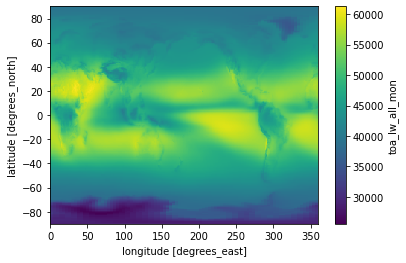

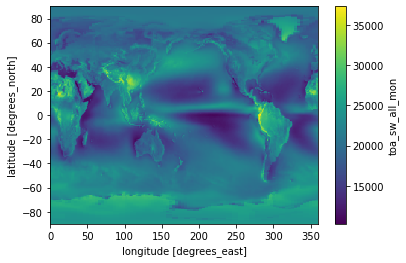

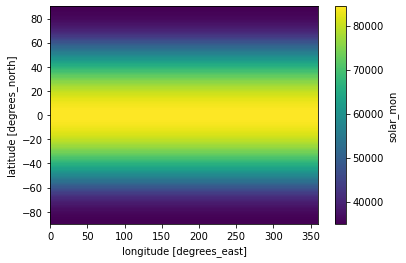

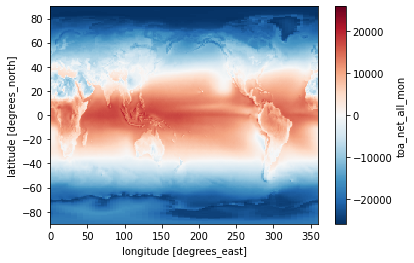

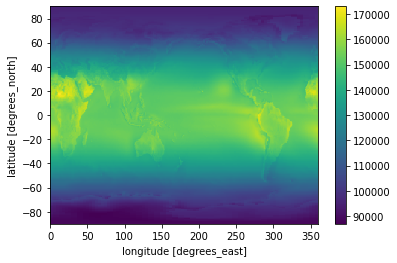

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import xarray as xr

# question_1
ds = xr.open_dataset('./CERES_EBAF-TOA_200003-201701.nc', engine="netcdf4")

ds.toa_lw_all_mon.sum(dim=['time']).plot()
plt.show()
ds.toa_sw_all_mon.sum(dim=['time']).plot()
plt.show()
ds.solar_mon.sum(dim=['time']).plot()
plt.show()
ds.toa_net_all_mon.sum(dim=['time']).plot()
plt.show()
ds_total_wave = ds.toa_sw_all_mon + ds.toa_lw_all_mon + ds.solar_mon

ds_total_wave.sum(dim=['time']).plot()
plt.show()

In [15]:
# question_2


income=ds.solar_mon.mean(dim='time')
lat_weights=np.cos(np.deg2rad(ds.lat))
income_weighted=income.weighted(lat_weights)
toa_sw_weighted=ds.toa_sw_all_mon.weighted(lat_weights)
toa_lw_weighted=ds.toa_lw_all_mon.weighted(lat_weights)
print(income_weighted.sum())
print(toa_sw_weighted.sum())
print(toa_lw_weighted.sum())

<xarray.DataArray 'solar_mon' ()>
array(14037950., dtype=float32)
<xarray.DataArray 'toa_sw_all_mon' ()>
array(8.3022995e+08, dtype=float32)
<xarray.DataArray 'toa_lw_all_mon' ()>
array(2.0121111e+09, dtype=float32)


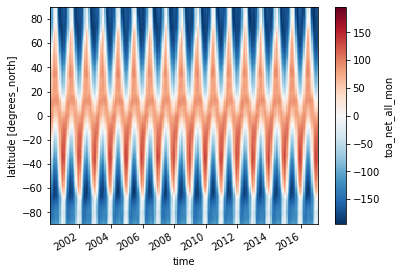

In [6]:
# question_3
net_all_lat = ds.toa_net_all_mon.mean(dim=['lon']).transpose().plot()
plt.show()

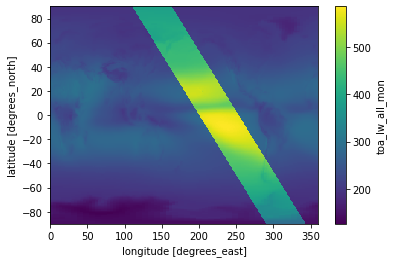

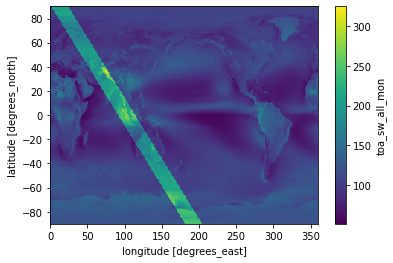

In [8]:
# question_4
a = ds.toa_lw_all_mon.mean(dim = ['time'])
a75 = a.quantile(0.75, dim = ['lon','lat'])
a25 = a.quantile(0.25, dim = ['lon','lat'])
aa75 = a.where(a.lon + a.lat <a75,0)
aa25 = a.where(a.lon + a.lat >a25,0)
lw_toa_low_high_cloud = aa25+aa75
lw_toa_low_high_cloud.plot()
plt.show()

b = ds.toa_sw_all_mon.mean(dim = ['time'])
b75 = b.quantile(0.75, dim = ['lon','lat'])
b25 = b.quantile(0.25, dim = ['lon','lat'])
bb75 = b.where(b.lon + b.lat <b75,0)
bb25 = b.where(b.lon + b.lat >b25,0)
sw_toa_low_high_cloud = bb25+bb75
sw_toa_low_high_cloud.plot()
plt.show()

In [18]:
# question 5
sw_lowc=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon <= b25).mean(dim='time')
lw_lowc=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon <= a25).mean(dim='time')
sw_highc=ds.toa_sw_all_mon.where(ds.cldarea_total_daynight_mon >= b75).mean(dim='time')
lw_highc=ds.toa_lw_all_mon.where(ds.cldarea_total_daynight_mon >= a75).mean(dim='time')
global_lowc=(sw_lowc+lw_lowc)/2
global_lowc.mean()
global_highc=(sw_highc+lw_highc)/2
global_highc.mean()


<xarray.DataArray ()>
array(161.89929, dtype=float32)
Coordinates:
    quantile  float64 0.25


AttributeError: 'DataArray' object has no attribute 'nanmean'